In [1]:
# # Run this and then restart the kernel at the start of each session to install
# # 'teotil3' in development mode
# !pip install -e /home/jovyan/projects/teotil3/

In [2]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import teotil3 as teo

plt.style.use("ggplot")

# Compare agricultural input versions from NIBIO

NIBIO have provided several versions of the national agricultural inputs. This notebooks checks for changes. If you want to compare the new agricultural inputs to those used by TEOTIL2, see `compare_old_new_agri_inputs.ipynb` instead.

In [3]:
# Versions to compare
v1 = "20241122"
v2 = "20260106"

# Years to compare
st_yr, end_yr = 2013, 2023

# Path to data
agri_fold = r"/home/jovyan/shared/common/teotil3/agri_data"

In [4]:
v1_df_list = []
v2_df_list = []
for year in range(st_yr, end_yr + 1):
    # Read data
    v1_dir = os.path.join(agri_fold, f"agri_data_v{v1}")
    v2_dir = os.path.join(agri_fold, f"agri_data_v{v2}")

    v1_df = teo.preprocessing.read_raw_agri_data(year, v1_dir)
    v2_df = teo.preprocessing.read_raw_agri_data(year, v2_dir)

    v1_df_list.append(v1_df)
    v2_df_list.append(v2_df)

v1_df = pd.concat(v1_df_list, axis="rows")
v2_df = pd.concat(v2_df_list, axis="rows")

id_cols = ["loss_type", "year", "regine"]
val_cols = [col for col in v1_df.columns if col not in id_cols]
df = pd.merge(v1_df, v2_df, on=id_cols, how="outer", suffixes=("_v1", "_v2"))
df.head()

,loss_type,year,regine,agriculture_totn_kg_v1,agriculture_din_kg_v1,agriculture_ton_kg_v1,agriculture_totp_kg_v1,agriculture_tdp_kg_v1,agriculture_tpp_kg_v1,agriculture_ss_kg_v1,...,agriculture_ss_kg_v2,agriculture_toc_kg_v2,agriculture_background_totn_kg_v2,agriculture_background_din_kg_v2,agriculture_background_ton_kg_v2,agriculture_background_totp_kg_v2,agriculture_background_tdp_kg_v2,agriculture_background_tpp_kg_v2,agriculture_background_ss_kg_v2,agriculture_background_toc_kg_v2
0,annual,2013,001.1A2A,9656.200689,7706.624507,1949.576182,311.145501,64.658906,246.486595,150484.069232,...,152597.551391,0.000000,1082.946582,864.319927,218.626655,17.909122,0.946097,16.963025,11476.838330,22564.325230
1,annual,2013,001.1A2B,7490.492195,5979.801755,1510.690440,183.127307,48.710352,134.416955,80159.171283,...,83988.994910,0.000000,840.217498,670.774887,169.442611,14.131257,0.744802,13.386455,9064.660462,18735.804017
2,annual,2013,001.1A3,9310.970665,7438.098192,1872.872473,133.910569,40.750404,93.160165,42112.830319,...,41626.734460,0.000000,1043.048347,833.252195,209.796152,12.553654,0.795281,11.758372,7407.244852,17145.495946
3,annual,2013,001.1A40,10576.521014,8459.188223,2117.332791,211.086988,53.881752,157.205235,98104.632741,...,97787.663812,0.000000,1184.705914,947.539333,237.166582,15.204165,0.876096,14.328069,9320.423706,19160.398340
4,annual,2013,001.1A4A,3393.204137,2709.168676,684.035461,107.975419,26.076868,81.898551,52715.684085,...,52695.301145,1871.840279,380.699153,303.959919,76.739234,5.294241,0.344585,4.949657,3085.690670,8346.797855


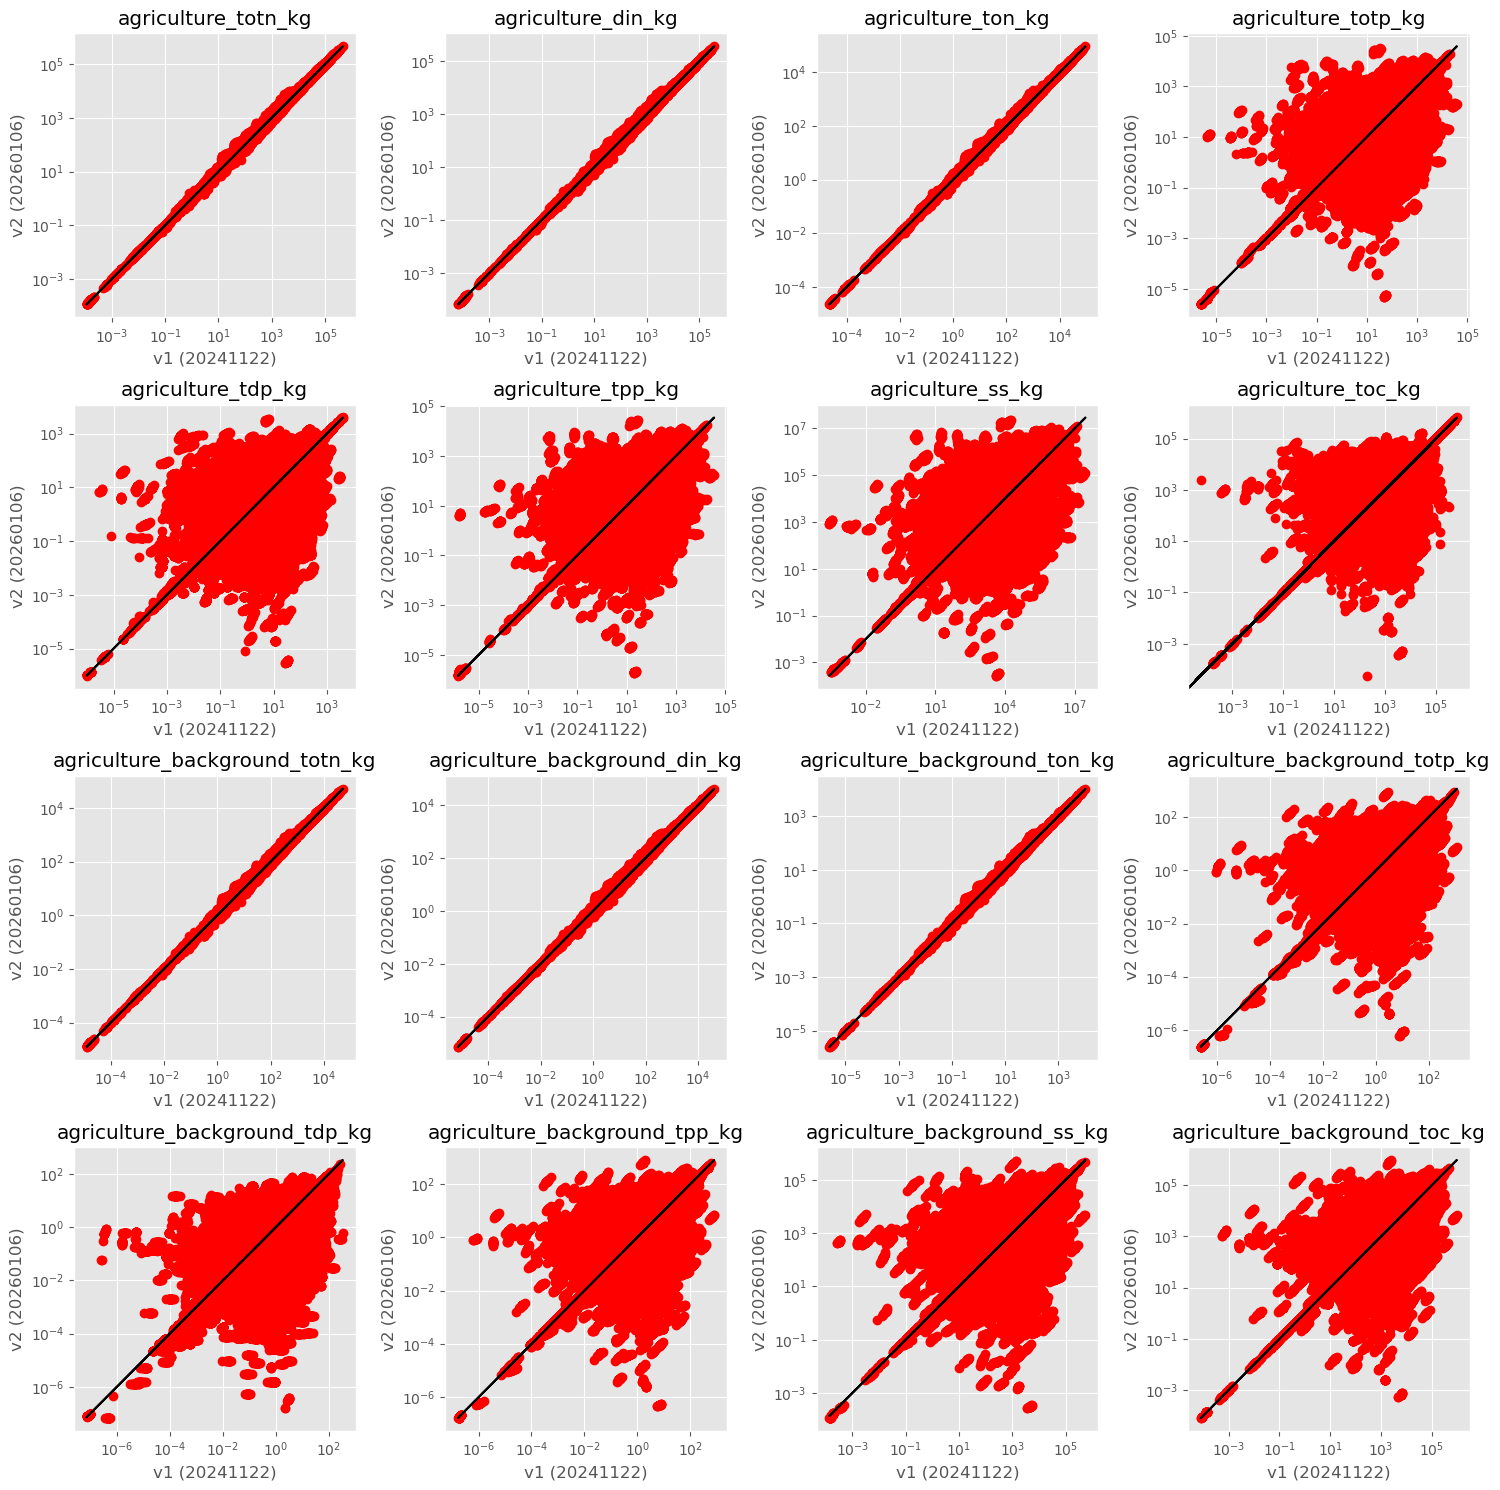

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
axes = axes.flatten()

for idx, col in enumerate(val_cols):
    axes[idx].plot(df[f"{col}_v1"], df[f"{col}_v2"], "ro")
    axes[idx].plot(df[f"{col}_v1"], df[f"{col}_v1"], "k-", label="1:1 line")
    axes[idx].set_title(col)
    axes[idx].set_xlabel(f"v1 ({v1})")
    axes[idx].set_ylabel(f"v2 ({v2})")
    axes[idx].set_xscale("log")
    axes[idx].set_yscale("log")
plt.tight_layout()
# plt.savefig("compare_agri_versions.png", dpi=200, bbox_inches="tight")

In [6]:
# df['toc_ratio'] = df['agriculture_toc_kg_v2'] / df['agriculture_toc_kg_v1']
# test = df[id_cols + ['agriculture_toc_kg_v1', 'agriculture_toc_kg_v2', 'toc_ratio']].sort_values('toc_ratio', ascending=False)
# test.head(20)

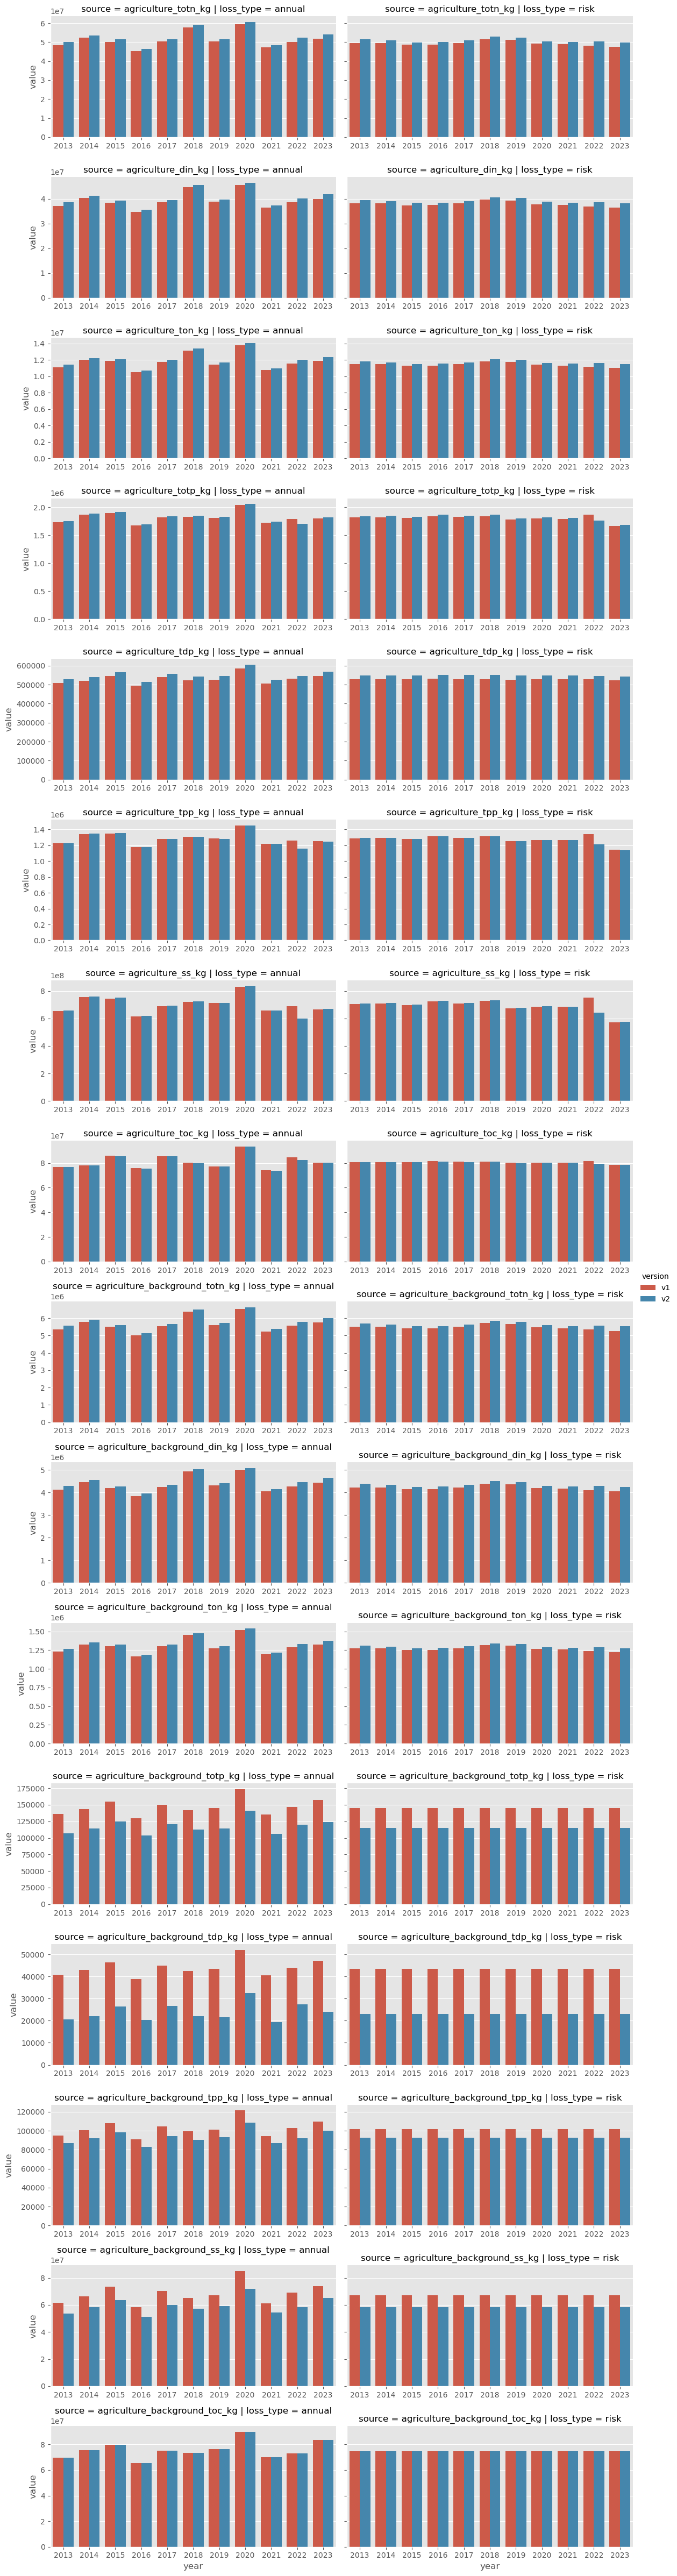

In [7]:
sum_df = (
    df.groupby(["loss_type", "year"])
    .sum(numeric_only=True)
    .reset_index()
    .melt(id_vars=["loss_type", "year"], var_name="source")
)
sum_df["version"] = sum_df["source"].str[-2:]
sum_df["source"] = sum_df["source"].str[:-3]

sn.catplot(
    data=sum_df,
    col="loss_type",
    row="source",
    hue="version",
    x="year",
    y="value",
    sharey="row",
    sharex=False,
    kind="bar",
    aspect=2,
    height=3,
)
# plt.savefig("annual_total_bar_charts.png", dpi=200, bbox_inches="tight")